In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
import sys 
# sys.path.append('../')

from build_solver import build_erg_time_opt_solver

In [9]:
args = {
    'N' : 700, 
    'x0' : np.array([2.0, 2.2])*0.5,
    'xf' : np.array([98.8, 92.0])*0.5,
    'erg_ub' : 0.01,
    'wrksp_bnds' : np.array([[0.,50.],[0.,50.]])
}

In [10]:
solver, obs = build_erg_time_opt_solver(args)
solver.solve(max_iter=10_000, eps=1e-7, alpha=1.00001)

done in  9887  iterations


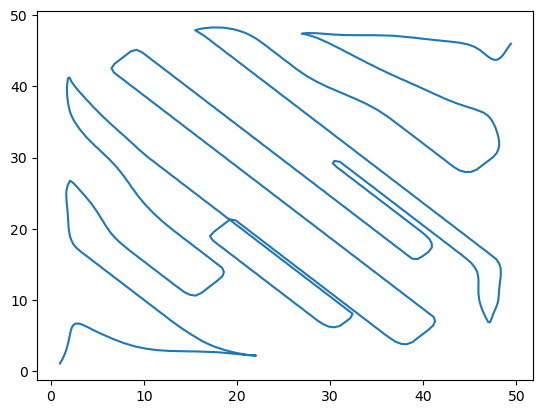

In [11]:
sol = solver.get_solution()
plt.plot(sol['x'][:,0], sol['x'][:,1])

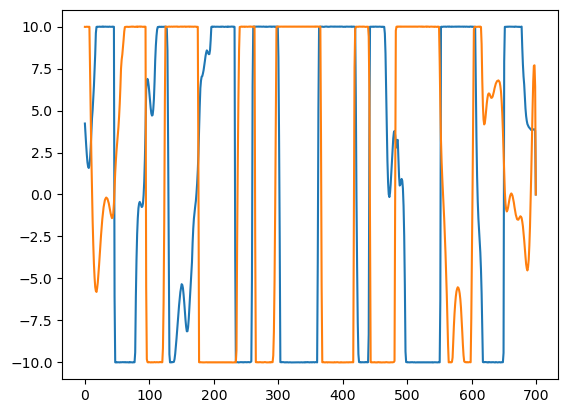

In [12]:
plt.plot(sol['u'])